In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import localSettings as ls
print(ls.main_path)

/home/nic/Dropbox/MicroBooNE/PELEE/


In [3]:
main_path = ls.main_path
sys.path.append(main_path)

In [4]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 04092020


In [5]:
SHRCALIBFACTOR = 1.00

In [6]:
# USING BDT?
USEBDT = True

In [7]:
# Doing Run3?
ISRUN3 = False

In [8]:
# scale to MCC8 CV?
MCC8WEIGHTS = False

In [9]:
import plotter
import importlib
importlib.reload(plotter)
import uproot, awkward
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
# importlib.reload(nue_booster)

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [39]:
tree = "NeutrinoSelectionFilter"

BNB = ""
EXT = ""
NU  = ""
NUE = ""
DRT = ""
NCPI0 = ""
CCPI0 = ""
CCNOPI = ""
CCCPI = ""
NCNOPI = ""
NCCPI = ""

if ISRUN3:
    BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_G1_beam_good_reco2_1e19'+ls.APPEND
    EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_G_all_reco2'+ls.APPEND
    NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2'+ls.APPEND
    NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'+ls.APPEND
    DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2'+ls.APPEND
    NCPI0  = 'prodgenie_nc_pi0_uboone_overlay_mcc9.1_v08_00_00_26_run3_G_reco2'+ls.APPEND
    CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run3_G_reco2'+ls.APPEND
    CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run3_reco2_reco2'+ls.APPEND
    CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run3_reco2_reco2'+ls.APPEND
    NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_new_run3_reco2_reco2'+ls.APPEND
    NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_New_run3_reco2_reco2'+ls.APPEND
    
else:
    BNB = 'data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19'+ls.APPEND
    EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C1_all_reco2'+ls.APPEND
#     EXT = 'data_extbnb_mcc9.1_v08_00_00_25_reco2_C1_C2_D1_D2_E1_E2_all_reco2'+ls.APPEND #Run1 + Run2
    NU  = 'prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2'+ls.APPEND
    NUE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'+ls.APPEND
    DRT = 'prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2'+ls.APPEND
    NCPI0  = 'prodgenie_nc_pi0_uboone_overlay-v08_00_00_26_run1_reco2_reco2'+ls.APPEND
    CCPI0  = 'prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run1_reco2'+ls.APPEND
    CCNOPI = 'prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run1_reco2_reco2'+ls.APPEND
    CCCPI  = 'prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'+ls.APPEND
    NCNOPI = 'prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'+ls.APPEND
    NCCPI  = 'prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2'+ls.APPEND

mc = uproot.open(ls.ntuple_path+NU+".root")[ls.fold][tree]
ncpi0 = uproot.open(ls.ntuple_path+NCPI0+".root")[ls.fold][tree]
ccpi0 = uproot.open(ls.ntuple_path+CCPI0+".root")[ls.fold][tree]
ccnopi = uproot.open(ls.ntuple_path+CCNOPI+".root")[ls.fold][tree]
cccpi = uproot.open(ls.ntuple_path+CCCPI+".root")[ls.fold][tree]
ncnopi = uproot.open(ls.ntuple_path+NCNOPI+".root")[ls.fold][tree]
nccpi = uproot.open(ls.ntuple_path+NCCPI+".root")[ls.fold][tree]
nue = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]
data = uproot.open(ls.ntuple_path+BNB+".root")[ls.fold][tree]
ext = uproot.open(ls.ntuple_path+EXT+".root")[ls.fold][tree]
dirt = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]
lee = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

uproot_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", "category",
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    "topological_score",
    #"shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    "crtveto","crthitpe","_closestNuCosmicDist",
    "NeutrinoEnergy2",
    #"run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    "trk_energy_proton_v", # track energy under proton hyp
    "trk_calo_energy_y_v", # track calo energy
    #"pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    "trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    "true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    "shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    "shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    "shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V",
    "pfnhits","pfnunhits"
]
#make the list unique
variables = list(set(variables))
print(variables)

#if not ISRUN3:
variables.remove("_closestNuCosmicDist")
variables.remove("crtveto")
variables.remove("crthitpe")
    
WEIGHTS = ["weightSpline","weightTune","weightSplineTimesTune"]#, "weightsGenie", "weightsFlux", "weightsReint"]
WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
           "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
           "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]
SYSTEMATICS = ['weightsFlux','weightsGenie']

nue = nue.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
mc = mc.pandas.df(variables + WEIGHTS + MCFVARS + SYSTEMATICS, flatten=False)
ncpi0 = ncpi0.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
ccpi0 = ccpi0.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
ccnopi = ccnopi.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
cccpi = cccpi.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
ncnopi = ncnopi.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
nccpi = nccpi.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
data = data.pandas.df(variables, flatten=False)
ext = ext.pandas.df(variables, flatten=False)
dirt = dirt.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
lee = lee.pandas.df(variables + WEIGHTSLEE + SYSTEMATICS, flatten=False)

['nu_flashmatch_score', 'trk_hits_tot', 'topological_score', 'contained_fraction', 'shr_dedx_Y', 'shr_tkfit_2cm_nhits_Y', '_closestNuCosmicDist', 'run', 'shr_dedx_Y_cali', 'shr_score', 'hits_y', 'tksh_angle', 'shr_tkfit_gap10_dedx_V', 'npion', 'NeutrinoEnergy2', 'shr_tkfit_gap10_nhits_Y', 'shr_energy_tot_cali', 'best_cosmic_flashmatch_score', 'shrclusfrac1', 'shr_theta', 'CosmicDirAll3D', 'reco_nu_vtx_sce_x', 'shr_tkfit_dedx_Y', 'trk_bkt_pdg', 'shr_pz', 'trk_energy_proton_v', 'shr_tkfit_gap10_dedx_U', 'crthitpe', 'backtracked_pdg', 'CosmicIPAll3D', 'trk_len', 'shr_tkfit_2cm_dedx_U', 'trk_llr_pid_score_v', 'shr_tkfit_npoints', 'trk_energy', 'shrmoliereavg', 'shr_distance', 'pion_e', 'trk_phi', 'shr_bkt_E', 'shr_tkfit_dedx_V', 'best_obviouscosmic_flashmatch_score', 'reco_nu_vtx_z', 'shr_bkt_pdg', 'nu_e', 'slclustfrac', 'shr_tkfit_nhits_U', 'p', 'shr_dedx_V', 'shr_tkfit_2cm_nhits_V', 'shr_tkfit_2cm_nhits_U', 'tksh_distance', 'shr_hits_tot', 'shrsubclusters0', 'pt', 'shr_pfp_id_v', 'pi0tru

In [40]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,dirt]

for i,df in enumerate(df_v):
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
    #df['weightSpline']  = df['weightSpline']  * df['weightTune']
    #df.loc[ df['npi0'] > 0, 'weightSplineTimesTune' ] = df['weightSpline'] * df['weightTune'] * 0.7 #scale down pi0s

In [41]:
# how to get the LLR-PID value for the "track candidate" (proton for nue selection, muon for numu)
# can be done for any variable
# code from Giuseppe!

df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
#df_v = [lee,mc,nue,ext,data,dirt]

for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['protonenergy'] = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']
    df['trkfit'] = df['shr_tkfit_npointsvalid'] / df['shr_tkfit_npoints']
    df['anglediff_Y'] = np.abs(df['secondshower_Y_dir']-df['shrclusdir2'])
    df['trkthetacos'] = np.cos(df['trk_theta'])
    #df['FMdiffOBV'] = df['nu_flashmatch_score']-df['best_obviouscosmic_flashmatch_score']
    #df['FMdiff'] = df['nu_flashmatch_score']-df['best_cosmic_flashmatch_score']

In [42]:
#
for i,df in enumerate(df_v):
    up = uproot_v[i]
    df["slclnhits"] = up.array("pfnhits").sum()
    df["slclnunhits"] = up.array("pfnunhits").sum()
#

In [43]:
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])
    df['shr_tkfit_dedx_avg'] = (df['shr_tkfit_nhits_Y']*df['shr_tkfit_dedx_Y'] + df['shr_tkfit_nhits_U']*df['shr_tkfit_dedx_U'] + df['shr_tkfit_nhits_V']*df['shr_tkfit_dedx_V'])/df['shr_tkfit_nhits_tot']
    df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])
    df['shr_tkfit_2cm_dedx_avg'] = (df['shr_tkfit_2cm_nhits_Y']*df['shr_tkfit_2cm_dedx_Y'] + df['shr_tkfit_2cm_nhits_U']*df['shr_tkfit_2cm_dedx_U'] + df['shr_tkfit_2cm_nhits_V']*df['shr_tkfit_2cm_dedx_V'])/df['shr_tkfit_2cm_nhits_tot']
    df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])
    df['shr_tkfit_gap10_dedx_avg'] = (df['shr_tkfit_gap10_nhits_Y']*df['shr_tkfit_gap10_dedx_Y'] + df['shr_tkfit_gap10_nhits_U']*df['shr_tkfit_gap10_dedx_U'] + df['shr_tkfit_gap10_nhits_V']*df['shr_tkfit_gap10_dedx_V'])/df['shr_tkfit_gap10_nhits_tot']
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']

In [44]:
INTERCEPT = 0.0
SLOPE = 0.83

# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["reco_e_qe"] = 0.938*((df["shr_energy"]+INTERCEPT)/SLOPE)/(0.938 - ((df["shr_energy"]+INTERCEPT)/SLOPE)*(1-np.cos(df["shr_theta"])))
    df["reco_e_rqe"] = df["reco_e_qe"]/df["reco_e"]

# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])
data["bnbdata"] = np.ones_like(data["shr_energy"])
ext["extdata"] = np.ones_like(ext["shr_energy"])

# test calibrating dedx on Y plane
#data["shr_tkfit_gap10_dedx_Y"] = data["shr_tkfit_gap10_dedx_Y"]*1.03
#ext["shr_tkfit_gap10_dedx_Y"] = ext["shr_tkfit_gap10_dedx_Y"]*1.03
#data["shr_tkfit_2cm_dedx_Y"] = data["shr_tkfit_2cm_dedx_Y"]*1.03
#ext["shr_tkfit_2cm_dedx_Y"] = ext["shr_tkfit_2cm_dedx_Y"]*1.03
#data["shr_tkfit_dedx_Y"] = data["shr_tkfit_dedx_Y"]*1.03
#ext["shr_tkfit_dedx_Y"] = ext["shr_tkfit_dedx_Y"]*1.03

In [45]:
# avoid double-counting of events out of FV in the NC/CC pi0 samples
# not needed anymore since we improved matching with filtered samples
#ncpi0 = ncpi0.query('category != 5')
#ccpi0 = ccpi0.query('category != 5')
#ccnopi = ccnopi.query('category != 5')
#nccpi = nccpi.query('category != 5')
#ncnopi = ncnopi.query('category != 5')

## avoid recycling unbiased ext events (i.e. selecting a slice with little nu content from these samples)
ccnopi = ccnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
cccpi = cccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
ncnopi = ncnopi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')
nccpi = nccpi.query('(nslice==0 | (slnunhits/slnhits)>0.1)')

# add back the cosmic category, for background only
df_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
for i,df in enumerate(df_v):
    df.loc[(df['category']!=1)&(df['category']!=10)&(df['category']!=11)&(df['category']!=111)&(df['slnunhits']/df['slnhits']<0.2), 'category'] = 4

In [46]:
lee["is_signal"] = lee["category"] == 11
data["is_signal"] = data["category"] == 11
nue["is_signal"] = nue["category"] == 11
mc["is_signal"] = mc["category"] == 11
dirt["is_signal"] = dirt["category"] == 11
ext["is_signal"] = ext["category"] == 11
ncpi0["is_signal"] = ncpi0["category"] == 11
ccpi0["is_signal"] = ccpi0["category"] == 11
ccnopi["is_signal"] = ccnopi["category"] == 11
cccpi["is_signal"] = cccpi["category"] == 11
ncnopi["is_signal"] = ncnopi["category"] == 11
nccpi["is_signal"] = nccpi["category"] == 11

lee.loc[lee['category'] == 1, 'category'] = 111
lee.loc[lee['category'] == 10, 'category'] = 111
lee.loc[lee['category'] == 11, 'category'] = 111

if (USEBDT == True):
    if (ISRUN3): train_ccpi0, ccpi0 = train_test_split(ccpi0, test_size=0.5, random_state=1990)

In [47]:
# variables to be trained on
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max","trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

In [48]:
LABELS = ['pi0','nonpi0']

if (USEBDT == True):
    for label, bkg_query in zip(LABELS, nue_booster.bkg_queries):
        with open(ls.pickle_path+'booster_%s_0304_extnumi.pickle' % label, 'rb') as booster_file:
            booster = pickle.load(booster_file)
            mc[label+"_score"] = booster.predict(
                xgb.DMatrix(mc[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nue[label+"_score"] = booster.predict(
                xgb.DMatrix(nue[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ext[label+"_score"] = booster.predict(
                xgb.DMatrix(ext[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            data[label+"_score"] = booster.predict(
                xgb.DMatrix(data[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            dirt[label+"_score"] = booster.predict(
                xgb.DMatrix(dirt[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            lee[label+"_score"] = booster.predict(
                xgb.DMatrix(lee[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ncpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccpi0[label+"_score"] = booster.predict(
                xgb.DMatrix(ccpi0[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ccnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ccnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            cccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(cccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            ncnopi[label+"_score"] = booster.predict(
                xgb.DMatrix(ncnopi[TRAINVAR]),
                ntree_limit=booster.best_iteration)
            nccpi[label+"_score"] = booster.predict(
                xgb.DMatrix(nccpi[TRAINVAR]),
                ntree_limit=booster.best_iteration)

In [49]:
dfbdt_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]

# Plotting part

In [50]:
import plotter

In [65]:
samples = {
    "mc": mc,
    "nue": nue,
    "data": data,
    "ext": ext,
    "dirt": dirt,
    "ncpi0": ncpi0,
    "ccpi0": ccpi0,
    "ccnopi": ccnopi,
    "cccpi": cccpi,
    "ncnopi": ncnopi,
    "nccpi": nccpi,
    "lee": lee,
}

if ISRUN3:
    scaling = 101.0/0.763
else:
    scaling = 101.0/4.08
scaling = 1

SPLIT = 1.0
if (USEBDT == True):
    SPLIT = 2.

#0304
if ISRUN3:
    weights = {
        "mc": 5.70e-03 * scaling,
        "nue": 1.21e-04 * scaling,
        "ext": 2.11e-02 * scaling,
        "dirt": 2.35e-02 * scaling,
        "lee": 1.21e-04 * scaling,
        "ncpi0": 3.33e-03 * scaling,
        "ccpi0": 1.18e-03 * SPLIT * scaling,
        "ncnopi": 1.11e-03 * scaling,
        "nccpi": 5.51e-04 * scaling,
        "ccnopi": 1.71e-03 * scaling,
        "cccpi": 1.44e-03 * scaling,
    }
    pot = 0.763e19*scaling
else:
    weights = {
        "mc": 3.12e-02 * scaling,
        "nue": 7.73e-04 * scaling,
#         "ext": 4.83e-02 * scaling, #C+D+E #C only: 1.40e-01
        "ext": 2.69E-01 * scaling,
        "dirt": 1.26e-01 * scaling,
        "lee": 7.73e-04 * scaling,
        "ncpi0": 1.53e-02 * scaling,
        "ccpi0": 1.17e-02 * scaling,
        "ncnopi": 1.12e-02 * scaling,
        "nccpi": 4.56e-03 * scaling,
        "ccnopi": 8.81e-03 * scaling,
        "cccpi": 6.74e-03 * scaling,
    }
    pot = 4.08e19*scaling
    
my_plotter = plotter.Plotter(samples, weights, pot=pot)
my_plotter_4e19 = plotter.Plotter(samples, weights, pot=4.08e19)
print(weights)

{'mc': 0.0312, 'nue': 0.000773, 'ext': 0.269, 'dirt': 0.126, 'lee': 0.000773, 'ncpi0': 0.0153, 'ccpi0': 0.0117, 'ncnopi': 0.0112, 'nccpi': 0.00456, 'ccnopi': 0.00881, 'cccpi': 0.00674}


In [76]:
samples = {
    "mc": mc,
    "nue": nue,
    "data": data,
    "ext": ext,
    "dirt": dirt,
    "ncpi0": ncpi0,
    "ccpi0": ccpi0,
    "ccnopi": ccnopi,
    "cccpi": cccpi,
    "ncnopi": ncnopi,
    "nccpi": nccpi,
    "lee": lee,
}

if ISRUN3:
    scaling = 101.0/0.763
else:
    scaling = 101.0/4.08
scaling = 69./4.08

SPLIT = 1.0
if (USEBDT == True):
    SPLIT = 2.

#0304
if ISRUN3:
    weights = {
        "mc": 5.70e-03 * scaling,
        "nue": 1.21e-04 * scaling,
        "ext": 2.11e-02 * scaling,
        "dirt": 2.35e-02 * scaling,
        "lee": 1.21e-04 * scaling,
        "ncpi0": 3.33e-03 * scaling,
        "ccpi0": 1.18e-03 * SPLIT * scaling,
        "ncnopi": 1.11e-03 * scaling,
        "nccpi": 5.51e-04 * scaling,
        "ccnopi": 1.71e-03 * scaling,
        "cccpi": 1.44e-03 * scaling,
    }
    pot = 0.763e19*scaling
else:
    weights = {
        "mc": 3.12e-02 * scaling,
        "nue": 7.73e-04 * scaling,
#         "ext": 4.83e-02 * scaling, #C+D+E #C only: 1.40e-01
        "ext": 2.69E-01 * scaling,
        "dirt": 1.26e-01 * scaling,
        "lee": 7.73e-04 * scaling,
        "ncpi0": 1.53e-02 * scaling,
        "ccpi0": 1.17e-02 * scaling,
        "ncnopi": 1.12e-02 * scaling,
        "nccpi": 4.56e-03 * scaling,
        "ccnopi": 8.81e-03 * scaling,
        "cccpi": 6.74e-03 * scaling,
    }
    pot = 4.08e19*scaling
    
my_plotter_69e19 = plotter.Plotter(samples, weights, pot=69e19)
print(weights)

{'mc': 0.5276470588235294, 'nue': 0.013072794117647057, 'ext': 4.5492647058823525, 'dirt': 2.1308823529411764, 'lee': 0.013072794117647057, 'ncpi0': 0.25875, 'ccpi0': 0.1978676470588235, 'ncnopi': 0.18941176470588234, 'nccpi': 0.07711764705882351, 'ccnopi': 0.1489926470588235, 'cccpi': 0.11398529411764706}


In [52]:
# muon selection
QUERY = 'nslice == 1'
#if ISRUN3: QUERY += ' and ((crtveto!=1) or (crthitpe < 100)) and (_closestNuCosmicDist > 20.)'
#QUERY += ' and trk_len > 20'
#QUERY += ' and topological_score > 0.06'
#QUERY += ' and reco_nu_vtx_sce_x > 5 and reco_nu_vtx_sce_x < 251'
#QUERY += ' and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110'
#QUERY += ' and reco_nu_vtx_sce_z > 20 and reco_nu_vtx_sce_z < 986'
#QUERY += ' and trkpid > 0.5'
#QUERY += ' and (trkthetacos < 0.853 or trkthetacos > 0.8531)'
#QUERY += ' and bkpdg == 2212 and (trkcompl < 0.5 or trkpur < 0.5)'

print (QUERY)

nslice == 1


In [53]:
# nue preselection
PRESQ = 'nslice == 1'
PRESQ += ' and selected == 1'
PRESQ += ' and shr_energy_tot_cali > 0.07'
PRESQ += ' and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)'

In [54]:
# 1eNp preselection
NPPRESQ = PRESQ
NPPRESQ += ' and n_tracks_contained > 0'
# 1eNp preselection for unblinding
NPPRESQ_u = NPPRESQ+' and n_showers_contained == 1'

In [55]:
# very loose box cuts
NPVLCUTQ = NPPRESQ
NPVLCUTQ += ' and CosmicIPAll3D > 10.'
NPVLCUTQ += ' and trkpid < 0.25'
NPVLCUTQ += ' and hits_ratio > 0.5'
NPVLCUTQ += ' and trkfit < 0.90'
NPVLCUTQ += ' and n_showers_contained == 1'
NPVLCUTQ += ' and tksh_distance < 10.0'
NPVLCUTQ += ' and tksh_angle > -0.9'

In [56]:
# loose box cuts
NPLCUTQ = NPPRESQ
NPLCUTQ += ' and CosmicIPAll3D > 10.'
NPLCUTQ += ' and trkpid < 0.02'
NPLCUTQ += ' and hits_ratio > 0.50'
NPLCUTQ += ' and shrmoliereavg < 9'
NPLCUTQ += ' and subcluster > 4'
NPLCUTQ += ' and trkfit < 0.65'
NPLCUTQ += ' and n_showers_contained == 1'
NPLCUTQ += ' and tksh_distance < 6.0'
NPLCUTQ += ' and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5)'
NPLCUTQ += ' and secondshower_Y_nhit < 50'
NPLCUTQ += ' and tksh_angle > -0.9'

In [57]:
# tight box cuts
NPTCUTQ = NPLCUTQ
NPTCUTQ += ' and CosmicIPAll3D > 30.'
NPTCUTQ += ' and CosmicDirAll3D > -0.98 and CosmicDirAll3D < 0.98'
NPTCUTQ += ' and trkpid < 0.02'
NPTCUTQ += ' and hits_ratio > 0.65'
NPTCUTQ += ' and shr_score < 0.25'
NPTCUTQ += ' and shrmoliereavg > 2 and shrmoliereavg < 10'
NPTCUTQ += ' and subcluster > 7'
NPTCUTQ += ' and trkfit < 0.70'
NPTCUTQ += ' and n_showers_contained == 1'
NPTCUTQ += ' and tksh_distance < 4.0'
NPTCUTQ += ' and trkshrhitdist2 < 1.5'
NPTCUTQ += ' and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 1.0 and shr_tkfit_dedx_max < 3.8)'
NPTCUTQ += ' and (secondshower_Y_nhit<=8 or secondshower_Y_dot<=0.8 or anglediff_Y<=40 or secondshower_Y_vtxdist>=100)'
NPTCUTQ += ' and secondshower_Y_nhit < 30'
NPTCUTQ += ' and tksh_angle > -0.9 and tksh_angle < 0.70'

In [58]:
# OLD loose box cuts
OLCUTQ = PRESQ
OLCUTQ += ' and CosmicIP > 20.'
OLCUTQ += ' and trkpid < 0.1'
OLCUTQ += ' and hits_ratio > 0.5'
OLCUTQ += ' and shr_score < 0.30'
OLCUTQ += ' and n_showers_contained == 1'
OLCUTQ += ' and tksh_distance < 6.0'
OLCUTQ += ' and shr_tkfit_2cm_dedx_avg < 4.0'
OLCUTQ += ' and tksh_angle > -0.9'
# OLD tight box cuts
OTCUTQ = OLCUTQ
OTCUTQ += ' and tksh_distance < 3.5'
OTCUTQ += ' and (shr_tkfit_2cm_dedx_Y > 0 and shr_tkfit_2cm_dedx_Y < 4.0 and shr_tkfit_2cm_dedx_U < 4.0 and shr_tkfit_2cm_dedx_V < 4.0)'
OTCUTQ += ' and (shr_tkfit_gap10_dedx_Y > 0 and shr_tkfit_gap10_dedx_Y < 4.5 and shr_tkfit_gap10_dedx_U < 4.5 and shr_tkfit_gap10_dedx_V < 4.5)'
OTCUTQ += ' and tksh_angle > -0.9 and tksh_angle < 0.75'
OTCUTQ += ' and shrmoliereavg > 2 and shrmoliereavg < 9'
OTCUTQ += ' and trkpid < -0.02'
OTCUTQ += ' and n_showers_contained == 1'
OTCUTQ += ' and shr_score < 0.275'
OTCUTQ += ' and hits_ratio > 0.60'
OTCUTQ += ' and (secondshower_Y_nhit<=8 or secondshower_Y_dot<=0.8 or anglediff_Y<=40 or secondshower_Y_vtxdist>=100)'
OTCUTQ += ' and (trkfit < 0.45 or subcluster > 6)'

In [59]:
# BDT cuts
# 0304 extnumi, pi0 and nonpi0
BDTCQ = NPLCUTQ
BDTCQ += ' and pi0_score > 0.67 and nonpi0_score > 0.70'

In [60]:
# Define actual selection
# QUERY = NPTCUTQ
QUERY = BDTCQ
# in case you do not want to look at the data
#QUERY += ' and bnbdata==0'
# in case you want to apply the CRT veto
#if ISRUN3: QUERY += ' and (crtveto!=1) and (_closestNuCosmicDist > 20.)'

In [61]:
# create output files based on selection
uproot_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
fname_v = [NUE,NU,NCPI0,CCPI0,CCNOPI,CCCPI,NCNOPI,NCCPI,NUE,EXT,BNB,DRT]

NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"

for i,name in enumerate(fname_v):
    if (i == 0):
        continue # skip LEE event. This one will be done within SBNFit
        
    df = dfbdt_v[i]
    
    fout = open(ls.ntuple_path+name+'.txt','w')
    dfsel = df.query(QUERY)
    if (i == 1):
        dfsel = dfsel.query(NU_Q)
    print ('file %s has %i selected entries'%(name,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        fout.write('%i %i %i \n'%(run,sub,evt))
    fout.close()

file prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run1_reco2_reco2_nuepresel has 0 selected entries
file prodgenie_nc_pi0_uboone_overlay-v08_00_00_26_run1_reco2_reco2_nuepresel has 12 selected entries
file prodgenie_cc_pi0_uboone_overlay_v08_00_00_26_run1_reco2_nuepresel has 6 selected entries
file prodgenie_CCmuNoPi_overlay_mcc9_v08_00_00_33_all_run1_reco2_reco2_nuepresel has 30 selected entries
file prodgenie_filter_CCmuCPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2_nuepresel has 7 selected entries
file prodgenie_ncnopi_overlay_mcc9_v08_00_00_33_run1_reco2_reco2_nuepresel has 4 selected entries
file prodgenie_NCcPiNoPi0_overlay_mcc9_v08_00_00_33_run1_reco2_reco2_nuepresel has 4 selected entries
file prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2_nuepresel has 3568 selected entries
file data_extbnb_mcc9.1_v08_00_00_25_reco2_C1_all_reco2_nuepresel has 0 selected entries
file data_bnb_mcc9.1_v08_00_00_25_reco2_C1_beam_good_reco2_5e19_

sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
Profile likelihood: 0.45 sigma @ 1.01e21 POT
s/sqrt(b): 0.13 sigma @ 1.01e21 POT


(0, 184.20789882144538)

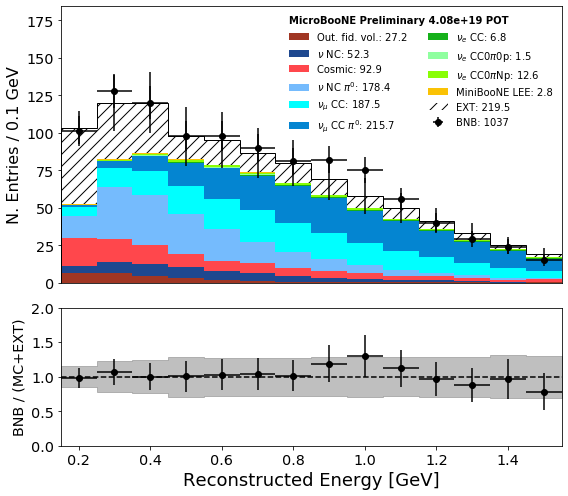

In [62]:
# v = "$\cos\left(\theta_{\mu}\right)$"

#QUERY += " & pi0truth_elec_etot<15 & npi0 == 0 & ccnc == 0"
#QUERY += " & muon_e>0.3 & npi0 == 0 & ccnc == 0"
#QUERY = "(muon_e<0.3 | pi0truth_elec_etot>=15) & npi0 == 0 & npion == 0 & ccnc == 0 & nu_pdg == 14 & category == 2"
#QUERY += " & ~((muon_e<0.3 | pi0truth_elec_etot>=15) & npi0 == 0 & npion == 0 & ccnc == 0 & nu_pdg == 14 & category != 5)"


VARIABLE, BINS, RANGE, XTIT = 'reco_e', 14, (0.15,1.55), r"Reconstructed Energy [GeV]"
# VARIABLE, BINS, RANGE, XTIT = 'reco',25,(0,1),r"topological score"
# VARIABLE, BINS, RANGE, XTIT = 'pi0_mass_Y',20,(0,500),"pi0 mass Y"

#VARIABLE, BINS, RANGE, XTIT = 'muon_e',20,(0.,1.),r"Muon Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0truth_elec_etot',20,(0.,60),r"Michel Energy [GeV]"

#fig, ax1, ax2 = my_plotter.plot_variable(
fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query=NPPRESQ,#+" and category != 111",
    kind="event_category",
    #kind="sample",
    #kind="interaction",
    #kind='particle_pdg',
    draw_sys=True,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE,
)[0:3]

print("Profile likelihood: %.2f sigma @ 1.01e21 POT" % my_plotter.significance_likelihood)
print("s/sqrt(b): %.2f sigma @ 1.01e21 POT" % my_plotter.significance)

#ax1.set_ylim(0,40)
#ax1.set_yscale("log")
#ax1.set_ylim(0,240)
ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
#ax2.set_ylim(0.5,1.5)
#fig.savefig(ls.plots_path+VARIABLE+"_"+date_time+".pdf")

In [ ]:
score_cuts = {
    'pi0_score': 0.67,
    'nonpi0_score': 0.70
}

bdt_vars = list(score_cuts.keys())

BDTQUERIES = []
BDTQUERIES.append("{} < {} and {} < {}".format(bdt_vars[0], score_cuts[bdt_vars[0]], bdt_vars[1], score_cuts[bdt_vars[1]]))
BDTQUERIES.append("{} > {} and {} < {}".format(bdt_vars[0], score_cuts[bdt_vars[0]], bdt_vars[1], score_cuts[bdt_vars[1]]))
BDTQUERIES.append("{} < {} and {} > {}".format(bdt_vars[0], score_cuts[bdt_vars[0]], bdt_vars[1], score_cuts[bdt_vars[1]]))
BDTQUERIES.append("{} > {} and {} > {}".format(bdt_vars[0], score_cuts[bdt_vars[0]], bdt_vars[1], score_cuts[bdt_vars[1]]))

for BDTQUERY in BDTQUERIES:
    BDTQUERY_FINAL = BDTQUERY# + ' and ' + NPLCUTQ
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e', 14, (0.15, 1.55), r"Reconstructed Energy [GeV]"
    fig, ax1, ax2 = my_plotter.plot_variable(
        VARIABLE,   
        query=BDTQUERY_FINAL,
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
#     plt.title()

    print("Profile likelihood: %.2f sigma @ 1.01e21 POT" % my_plotter.significance_likelihood)
    print("s/sqrt(b): %.2f sigma @ 1.01e21 POT" % my_plotter.significance)
    
#     plt.savefig(plots_path+'')

In [ ]:
cccpi.query(QUERY)[["run","sub","evt","reco_e"]]
# data.query(QUERY)[["run","sub","evt","reco_e","pi0_score","nonpi0_score"]]

In [ ]:
mc.query(QUERY+"& ccnc==0 & nu_pdg==14 & mcf_np0==0")[["run","sub","evt","reco_e","mcf_lep_e","mcf_mcshr_elec_etot"]]

In [ ]:
QUERY = NPLCUTQ
QUERY += ' and reco_e > 0.15 and reco_e < 1.55'
#QUERY += ' and shr_tkfit_dedx_Y < 0'
plots = []
plots.append(['tksh_distance',20,(0,10),"tksh distance [cm]"])
plots.append(['shr_tkfit_nhits_tot',20,(0,20),"shr tkfit nhits (tot, 0-4 cm) [MeV/cm]"])
plots.append(['shr_tkfit_dedx_max',20,(0,10),"shr tkfit dE/dx (best-plane, 0-4 cm) [MeV/cm]"])
plots.append(['tksh_angle',20,(-1,1),"cos(tksh angle)"])
plots.append(['trkfit',20,(0,1),"Fraction of Track-fitted points"])
plots.append(['shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"])
plots.append(['trkpid',15,(-1,1),"track LLR PID"])
plots.append(['n_showers_contained',10,(0,10),"n showers contained"])
#plots.append(['n_tracks_contained',10,(0,10),"n tracks contained"])
plots.append(['shr_score',20,(0,0.5),"shr score"])
#plots.append(['trk_score',20,(0.5,1.0),"trk score"])
plots.append(['hits_ratio',20,(0,1),"shower hits/all hits"])
#plots.append(['slclustfrac',20,(0,1),"slice clustered fraction"])
#plots.append(['CosmicIP',20,(0,200),"Cosmic IP from vtx [cm]"])
plots.append(['reco_nu_vtx_sce_x',20,(-10,260),"x"])
plots.append(['reco_nu_vtx_sce_y',20,(-120,120),"y"])
plots.append(['reco_nu_vtx_sce_z',20,(0,1100),"z"])
#plots.append(['reco_e_rqe',20,(0,2),"rqe"])
plots.append(['trkshrhitdist2',20,(0,10),"2D trk-shr distance (Y)"])
plots.append(['subcluster',20,(0,20),"N sub-clusters in shower"])
#plots.append(['shrmoliererms',20,(0,5000),"RMS Moliere angle [degrees]"])
plots.append(['shr_energy_tot_cali',20,(0,1),"shr energy (calibrated) [GeV]"])
plots.append(['contained_fraction',20,(0.,1),"contained fraction"])
plots.append(['hits_y',20,(0.,1000),"N hits Y plane"])
#plots.append(['pi0_mass_Y',25,(-50.,200),"pi0 mass [Mev]"])
#plots.append(['pi0_gammadot',20,(-1,1),"2-shower angle"])
plots.append(['secondshower_Y_nhit',20,(0,200),"Nhit 2nd shower (Y)"])
plots.append(['secondshower_Y_dot',20,(-1,1),"cos(2nd shower direction wrt vtx) (Y)"])
plots.append(['anglediff_Y',20,(0,350),"angle diff 1st-2nd shower (Y) [degrees]"])
plots.append(['secondshower_Y_vtxdist',20,(0.,200),"vtx dist 2nd shower (Y)"])
plots.append(['CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"])
plots.append(['CosmicDirAll3D',20,(-1,1),"cos(CosmicDirAll3D)"])

if USEBDT:
    plots = []
    #plots.append(['pi0_score',20,(0.9,1),"$\pi^0$ BDT response"])
    #plots.append(['nonpi0_score',20,(0.9,1),"non-$\pi^0$ BDT response"])
    plots.append(['pi0_score',10,(0.,0.5),"$\pi^0$ BDT response"])
    plots.append(['nonpi0_score',10,(0.,0.5),"non-$\pi^0$ BDT response"])
    plots.append(['pi0_score',5,(0.5,1.0),"$\pi^0$ BDT response"])
    plots.append(['nonpi0_score',5,(0.5,1.0),"non-$\pi^0$ BDT response"])
for VARIABLE, BINS, RANGE, XTIT in plots:
    print(VARIABLE, BINS, RANGE, XTIT)
    fig, ax1, ax2 = my_plotter.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="interaction",
        #kind="sample",
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE,
    )[0:3]
    #ax1.set_ylim(0,ax1.get_ylim()[1]*1.4)
    #ax1.set_yscale("log")
    #fig.show()
    #fig.savefig(ls.plots_path+"/presel/"+VARIABLE+"_"+date_time+"_presel.pdf")
    #fig.savefig(ls.plots_path+""+VARIABLE+"_highscore.pdf")
    #break

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [35]:
#define sidebands queries

queries = {}

score_cuts = {
    'pi0_score': [0., 0.1, 0.67, 1.],
    'nonpi0_score': [0., 0.1, 0.70, 1.],
}
bdt_vars = list(score_cuts.keys())
template_query = "({} < {var1} < {}) and ({} < {var2} < {}) and ~(({var1} > {}) and ({var2} > {}))"

stages = ['far_pid', 'near_pid', 'signal_pid']

for i, (cut1, cut2) in enumerate(zip(zip(score_cuts[bdt_vars[0]][:-1], score_cuts[bdt_vars[0]][1:]), zip(score_cuts[bdt_vars[1]][:-1], score_cuts[bdt_vars[1]][1:]))):
    this_label = stages[i]
    queries[this_label] = f"({cut1[0]} < {bdt_vars[0]} < {score_cuts[bdt_vars[0]][-1]}) and ({cut2[0]} < {bdt_vars[1]} < {score_cuts[bdt_vars[1]][-1]}) and ~(({bdt_vars[0]} > {cut1[1]}) and ({bdt_vars[1]} > {cut2[1]}))"
    if i < 2:
        queries[this_label] += (' and ' + NPPRESQ_u)
    if i == 2:
        queries[this_label] += (' and ' + NPLCUTQ)
        

score_cuts = {
    'reco_e': [0.05, 0.85, 1.05, 2.05],
}
bdt_vars = list(score_cuts.keys())

template_query = "({} < {var1} < {})"

stages = ['signal_energy', 'near_energy', 'far_energy']

for i, cut1 in enumerate(zip(score_cuts[bdt_vars[0]][:-1], score_cuts[bdt_vars[0]][1:])):
    this_label = stages[i]
    queries[this_label] = (f"({cut1[0]} < {bdt_vars[0]} < {cut1[1]})")
    if i < 2:
        queries[this_label] += (' and ' + NPPRESQ_u)
    if i == 2:
        queries[this_label] += (' and ' + NPPRESQ_u)

variable_labels = {
    'pi0_score': r'$\pi_0$ score',
    'nonpi0_score': r'non $\pi_0$ score',
    'reco_e': 'reconstructed energy',
}

In [37]:
#2d plots

this_folder = 'correlation_bdt_scores/'
!mkdir -p $ls.plots_path$this_folder
this_save_foler = ls.plots_path+this_folder

selections = {
    'pre selection cuts': NPPRESQ,
    'loose selection cuts': NPLCUTQ
}

bdt_scores = ['pi0_score', 'nonpi0_score']
score_binning = [0, 1, 25]
samples_for_plots = {
    'nue': nue, 
    'ncpi0': ncpi0,
    'ccpi0': ccpi0,
    'ccnopi': ccnopi
    }

for selection, query in selections.items():
    for name, sample in samples_for_plots.items():
#         for bdt_score in bdt_scores:
#             plt.hist(sample.query(query)[bdt_score].values,
#                      bins=score_binning[2],
#                      range=[score_binning[0], score_binning[1]],
#                      histtype='step',
#                      lw=2,
#                      label=bdt_score)
#         plt.legend(loc='upper left')
#         plt.xlabel('BDT score after ' + selection)
#         plt.title(name, loc='left')
#         plt.tight_layout()
#         plt.savefig(ls.plots_path+selection+'_'+name+'_bdt_scores'+'.png', dpi=250)
#         plt.savefig(ls.plots_path+selection+'_'+name+'_bdt_scores'+'.pdf', dpi=250)
#         plt.close()

        plt.hist2d(sample.query(query)[bdt_scores[0]], sample.query(query)[bdt_scores[1]],
                   bins=[score_binning[2], score_binning[2]],
                   range=[[score_binning[0], score_binning[1]], [score_binning[0], score_binning[1]]],
                   norm=LogNorm())
        plt.colorbar()
        plt.xlabel(variable_labels[bdt_scores[0]])
        plt.ylabel(variable_labels[bdt_scores[1]])
        plt.title(name + ' after ' + selection, loc='left')
        plt.tight_layout()
        plt.savefig((this_save_foler+selection+'_'+name+'_2d_bdt_scores'+'.png').replace(' ', '_'), dpi=250)
        plt.savefig((this_save_foler+selection+'_'+name+'_2d_bdt_scores'+'.pdf').replace(' ', '_'), dpi=250)
        plt.close()

In [67]:
# querys for bdt cuts
this_folder = 'bdt_sidebands/'
!mkdir -p $ls.plots_path$this_folder
this_save_foler = ls.plots_path+this_folder

VARIABLE, BINS, RANGE, XTIT = 'reco_e', 20, (0.05, 2.05), r"Reconstructed Energy [GeV]"

score_cuts = {
    'pi0_score': [0., 0.1, 0.67, 1.],
    'nonpi0_score': [0., 0.1, 0.70, 1.],
}

bdt_vars = list(score_cuts.keys())
template_query = "({} < {var1} < {}) and ({} < {var2} < {}) and ~(({var1} > {}) and ({var2} > {}))"

selection_labels = [
    'Far sideband\nPre-selection, n showers contained = 1\n{} < {} < {}, {} < {} < {}',
    'Close sideband\nPre-selection, n showers contained = 1\n{} < {} < {}, {} < {} < {}',
    'Signal region\nLoose-selection\n{} < {} < {}, {} < {} < {}',
]

stages = ['far', 'near', 'signal']

QUERIES = {}
for i, (cut1, cut2) in enumerate(zip(zip(score_cuts[bdt_vars[0]][:-1], score_cuts[bdt_vars[0]][1:]), zip(score_cuts[bdt_vars[1]][:-1], score_cuts[bdt_vars[1]][1:]))):
    this_label = selection_labels[i].format(cut1[0], variable_labels[bdt_vars[0]], cut1[1], cut2[0], variable_labels[bdt_vars[1]], cut2[1])
    QUERIES[this_label] = f"({cut1[0]} < {bdt_vars[0]} < {score_cuts[bdt_vars[0]][-1]}) and ({cut2[0]} < {bdt_vars[1]} < {score_cuts[bdt_vars[1]][-1]}) and ~(({bdt_vars[0]} > {cut1[1]}) and ({bdt_vars[1]} > {cut2[1]}))"
    if i < 2:
        QUERIES[this_label] += (' and ' + NPPRESQ_u)
    if i == 2:
        QUERIES[this_label] += (' and ' + NPLCUTQ)

for i, (selection_label, QUERY) in enumerate(QUERIES.items()):
    # non sys, 5e19
    fig, ax1, ax2 = my_plotter_4e19.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.25)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_4e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_4e19.pdf')
    plt.close()
    
    # sys, 5e19
    fig, ax1, ax2 = my_plotter_4e19.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=True,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.25)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_4e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_4e19.pdf')
    plt.close()
    
    
    # non sys, 69e19
    fig, ax1, ax2 = my_plotter_69e19.plot_variable(
        VARIABLE,   
        query=QUERY+ ' and bnbdata == 0',
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.25)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_69e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_69e19.pdf')
    plt.close()
    
    # sys, 69e19
    fig, ax1, ax2 = my_plotter_69e19.plot_variable(
        VARIABLE,   
        query=QUERY+ ' and bnbdata == 0',
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=True,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.25)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_69e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_69e19.pdf')
    plt.close()

sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
Error calculating the significance operands could not be broadcast together with shapes (20,) (19,) (20,) 


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)


In [75]:
# querys for reco_e cuts
this_folder = 'bdt_sidebands/'
!mkdir -p $ls.plots_path$this_folder
this_save_foler = ls.plots_path+this_folder

VARIABLE, BINS, RANGE, XTIT = 'pi0_score', 30, (0., 1.), r"$\pi_0$ BDT score"

score_cuts = {
    'reco_e': [0.05, 0.85, 1.05, 2.05],
}
bdt_vars = list(score_cuts.keys())

template_query = "({} < {var1} < {})"

selection_labels = [
    'Signal region\nPre-selection, n showers contained = 1\n{} GeV < {} < {} GeV',
    'Close sideband\nPre-selection, n showers contained = 1\n{} GeV < {} < {} GeV',
    'Far sideband\nPre-selection, n showers contained = 1\n{} GeV < {} < {} GeV',
]

stages = ['signal', 'near', 'far']

QUERIES = {}
for i, cut1 in enumerate(zip(score_cuts[bdt_vars[0]][:-1], score_cuts[bdt_vars[0]][1:])):
    this_label = selection_labels[i].format(cut1[0], variable_labels[bdt_vars[0]], cut1[1])
    QUERIES[this_label] = (f"({cut1[0]} < {bdt_vars[0]} < {cut1[1]})")
    if i < 2:
        QUERIES[this_label] += (' and ' + NPPRESQ_u)
    if i == 2:
        QUERIES[this_label] += (' and ' + NPPRESQ_u)


for i, (selection_label, QUERY) in enumerate(QUERIES.items()):
    # non sys, 5e19
    fig, ax1, ax2 = my_plotter_4e19.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_yscale('log')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.5)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_4e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_4e19.pdf')
    plt.close()
    
    # sys, 5e19
    fig, ax1, ax2 = my_plotter_4e19.plot_variable(
        VARIABLE,   
        query=QUERY,
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=True,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_yscale('log')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.5)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_4e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_4e19.pdf')
    plt.close()
    
    
    # non sys, 69e19
    fig, ax1, ax2 = my_plotter_69e19.plot_variable(
        VARIABLE,   
        query=QUERY+ ' and bnbdata == 0',
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=False,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_yscale('log')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.5)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_69e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_no_sys_69e19.pdf')
    plt.close()
    
    # sys, 69e19
    fig, ax1, ax2 = my_plotter_69e19.plot_variable(
        VARIABLE,   
        query=QUERY+ ' and bnbdata == 0',
        kind="event_category",
        #kind="sample",
        #kind="interaction",
        #kind='particle_pdg',
        draw_sys=True,
        stacksort=3,
        title=XTIT,
        #bins=asymm_bins,
        bins=BINS,
        range=RANGE,
        )[0:3]
    
    ax1.set_yscale('log')
    ax1.set_ylim(0, ax1.get_ylim()[1]*1.5)
    ax1.set_title(selection_label, loc='left')
    plt.tight_layout()
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_69e19.png', dpi=250)
    plt.savefig(this_save_foler+VARIABLE+'_'+stages[i]+'_sys_69e19.pdf')
    plt.close()

/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:124: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:124: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi
sample :  mc
sample :  nue
sample :  dirt
sample :  ncpi0
sample :  ccpi0
sample :  ccnopi
sample :  cccpi
sample :  ncnopi
sample :  nccpi


/home/nic/Dropbox/MicroBooNE/PELEE/plotter.py:228: RuntimeWarning: invalid value encountered in double_scalars
  for i, k in enumerate(num)
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:124: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


In [77]:
# plot variables for nues, cutting on some variables (combination of BDT scores and reco_e)
# define the queries for the PID and for the reco_energy and then here simply loop on variables and on cuts
this_folder = 'distribution_in_pid_sidebands/'
!mkdir -p $ls.plots_path$this_folder
this_save_folder = ls.plots_path+this_folder

sample = nue
title = r'CC0$\pi$ Np truth level selected' + '\nand reco_energy < 0.85 GeV'
plots = []

plots.append(['tksh_angle',20,(-1,1),"cos(tksh angle)"])
plots.append(['trk_len',20,(0, 50),"Track length [cm]"])
plots.append(['shr_energy_tot_cali',20,(0,1),"shr energy (calibrated) [GeV]"])
plots.append(['pi0_score', 20, (0., 1.), r"$\pi_0$ BDT score"])
plots.append(['nonpi0_score', 20, (0., 1.), r"non $\pi_0$ BDT score"])
plots.append(['reco_e', 20, (0.05, 2.05), r"Reconstructed Energy [GeV]"])
plots.append(['nu_e', 20, (0.0, 2.0), r"True neutrino Energy [GeV]"])

query_labels = ['far_pid', 'near_pid', 'signal_pid']
additional_query = 'and reco_e < 0.85 and category == 11'
for plot in plots:
    for query_label in query_labels:
        this_query = queries[query_label] + additional_query 
        this_entries = sample.query(this_query)[plot[0]].values
        this_weights = np.ones(this_entries.shape) * weights['nue']
        plt.hist(this_entries,
                     bins=plot[1],
                     range=plot[2],
                     histtype='step',
                     lw=2,
                     label=query_label,
                     weights=this_weights)
    plt.legend()
    plt.title(title, loc='left')
    plt.xlabel(plot[3])
    plt.ylabel("Expected events in 6.9e20 POT")
    plt.tight_layout()
    plt.savefig(this_save_folder+plot[0]+'.png', dpi=250)
    plt.savefig(this_save_folder+plot[0]+'.pdf', dpi=250)
    plt.close()

In [78]:
# plot variables for nues, cutting on some variables (combination of BDT scores and reco_e)
# define the queries for the PID and for the reco_energy and then here simply loop on variables and on cuts
this_folder = 'distribution_in_energy_sidebands/'
!mkdir -p $ls.plots_path$this_folder
this_save_folder = ls.plots_path+this_folder

sample = nue
title = r'CC0$\pi$ Np truth level selected' + '\nand signal pid region'
plots = []

plots.append(['tksh_angle',20,(-1,1),"cos(tksh angle)"])
plots.append(['trk_len',20,(0, 50),"Track length [cm]"])
plots.append(['shr_energy_tot_cali',20,(0,1),"shr energy (calibrated) [GeV]"])
plots.append(['pi0_score', 20, (0., 1.), r"$\pi_0$ BDT score"])
plots.append(['nonpi0_score', 20, (0., 1.), r"non $\pi_0$ BDT score"])
plots.append(['reco_e', 20, (0.05, 2.05), r"Reconstructed Energy [GeV]"])
plots.append(['nu_e', 20, (0.0, 2.0), r"True neutrino Energy [GeV]"])

query_labels = ['far_energy', 'near_energy', 'signal_energy']
additional_query = 'and' + queries['signal_pid'] + 'and category == 11'
for plot in plots:
    for query_label in query_labels:
        this_query = queries[query_label] + additional_query
        this_entries = sample.query(this_query)[plot[0]].values
        this_weights = np.ones(this_entries.shape) * weights['nue']
        plt.hist(this_entries,
                     bins=plot[1],
                     range=plot[2],
                     histtype='step',
                     lw=2,
                     label=query_label,
                     weights=this_weights)
    plt.legend()
    plt.title(title, loc='left')
    plt.xlabel(plot[3])
    plt.ylabel("Expected events in 6.9e20 POT")
    plt.tight_layout()
    plt.savefig(this_save_folder+plot[0]+'.png', dpi=250)
    plt.savefig(this_save_folder+plot[0]+'.pdf', dpi=250)
    plt.close()